In [1]:
!pip install -U scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

# 1. The data file for this project is available from the Seaborn website. To load this data into a DataFrame, run this code:

In [3]:
mpg = sns.load_dataset('mpg')

# 2. Display the first five rows of data.

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# 3. Get the correlation data for the mpg column. Sort the results to make it easier to see the columns with the stronger correlations.

In [5]:
mpgColumns= list(mpg.columns)

columnNumbers= [num_col for num_col in mpgColumns if mpg[num_col].dtype in ['int64','float64']]

print(columnNumbers)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [6]:
columnNumbers = mpg.select_dtypes(include=[np.number]).columns
mpgSortedCorrelation  = mpg[columnNumbers].corr()['mpg'].sort_values(ascending=False)
print(mpgSortedCorrelation)

mpg             1.000000
model_year      0.579267
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


# 4. Use the column with the strongest positive or negative correlation to the mpg column to split the data into test and training datasets, where the test dataset consists of 20% of the total dataset. Be sure to specify a value for the random_state parameter.

In [8]:
strongestCorrelation = mpgSortedCorrelation.index[1]
X = mpg[[strongestCorrelation]]
y = mpg['mpg']
x_mpg_train, x_mpg_test, y_mpg_train, y_mpg_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 5. Create a linear regression model from the training dataset

In [9]:
linear_reg_mpg = LinearRegression()
linear_reg_mpg.fit(x_mpg_train, y_mpg_train)

LinearRegression()

# 6. Score the model using the test dataset.

In [10]:
score = linear_reg_mpg.score(x_mpg_test, y_mpg_test)

# 7. Score the model using the training dataset.

In [11]:
linear_reg_mpg.score(x_mpg_train, y_mpg_train)

0.29032996354329643

# 8. Predict the y values based on the x values in the test dataset, and store the results in a variable. Then, put the predicted values in a DataFrame.

In [18]:
y_predicted_values = linear_reg_mpg.predict(x_mpg_test)
predicted = pd.DataFrame({'Predicted': y_predicted_values}, index=x_mpg_test.index)
predicted.head()

,Predicted
10,16.557320
261,25.648267
354,29.057372
277,25.648267
17,16.557320


# 9. Join the y_test and predicted data with the x_test data, save the combined data in a new DataFrame, and then display the first five rows of data.

In [13]:
join_y_and_x_test = x_mpg_test.join(y_mpg_test).join(predicted)
join_y_and_x_test.head()

,model_year,mpg,Predicted
10,70,15.0,16.557320
261,78,18.1,25.648267
354,81,34.5,29.057372
277,78,16.2,25.648267
17,70,21.0,16.557320


# 10. Add the residuals to the new DataFrame.

In [14]:
join_y_and_x_test['Residuals'] = y_mpg_test - y_predicted_values
join_y_and_x_test

,model_year,mpg,Predicted,Residuals
10,70,15.0,16.557320,-1.557320
261,78,18.1,25.648267,-7.548267
354,81,34.5,29.057372,5.442628
277,78,16.2,25.648267,-9.448267
17,70,21.0,16.557320,4.442680
...,...,...,...,...
372,82,27.0,30.193740,-3.193740
375,82,36.0,30.193740,5.806260
371,82,29.0,30.193740,-1.193740
28,70,9.0,16.557320,-7.557320


## 11. Plot the residuals in a Seaborn KDE plot

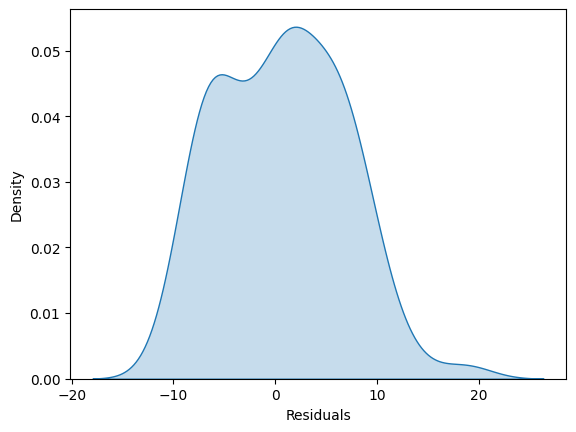

In [15]:
sns.kdeplot(data=join_y_and_x_test['Residuals'], shade=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

## 12. Melt the actual and predicted MPG columns together, assigning appropriate values to the variable and value names.

In [16]:
meltedMPG_df = pd.melt(join_y_and_x_test, value_vars=['mpg', 'Predicted'], var_name='Type', value_name='Miles Per Gallon')
meltedMPG_df

,Type,Miles Per Gallon
0,mpg,15.000000
1,mpg,18.100000
2,mpg,34.500000
3,mpg,16.200000
4,mpg,21.000000
...,...,...
155,Predicted,30.193740
156,Predicted,30.193740
157,Predicted,30.193740
158,Predicted,16.557320


## 13. Use a Seaborn scatter plot to plot the predicted data.

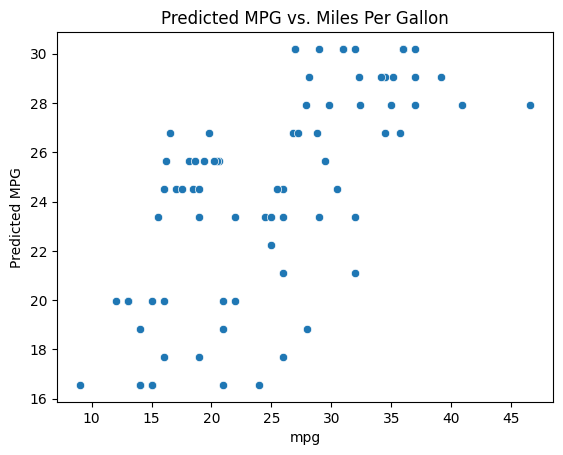

In [17]:
sns.scatterplot(data=join_y_and_x_test, x='mpg', y='Predicted')
plt.ylabel('Predicted MPG')
plt.title('Predicted MPG vs. Miles Per Gallon')
plt.show()